In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
import copy

with MPRester("CZceLJ3kGnm9d5zpfdqDbLaL8n671YIQ") as m:

    data = m.get_bandstructure_by_material_id("mp-961711")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

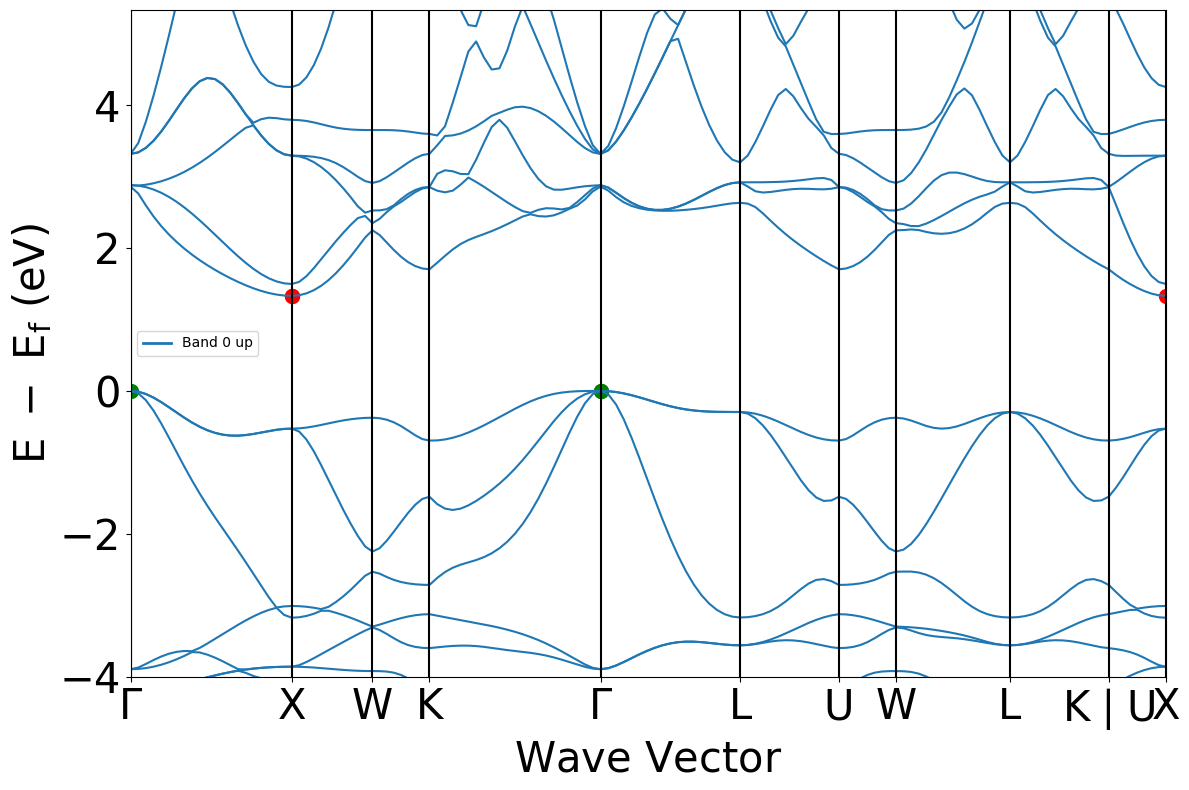

In [2]:
bandstruct = BSPlotter(data)
bandstruct.get_plot(vbm_cbm_marker=True)

# Bande interdite 

In [3]:
gap = data.get_band_gap()
print("la largeur du gap direct est de :",gap['energy'],"eV")
print("le vecteur d'onde se déplace alors dans la direction :",gap['transition'])


la largeur du gap direct est de : 1.3297999999999996 eV
le vecteur d'onde se déplace alors dans la direction : \Gamma-X


In [4]:
print("Bande(s) de valence de plus haute énergie: ", data.get_vbm()['band_index'],'\n')
print("Bande(s) de conduction de plus basse énergie: ", data.get_cbm()['band_index'],'\n')

Bande(s) de valence de plus haute énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11, 12]}) 

Bande(s) de conduction de plus basse énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [13]}) 



La bande nr. 12 faisant partie de la bande de valance est celle avec la plus haute énergie.
La bande nr. 13 faisant partie de la bande de conduction est celle avec la plus basse énergie.

# Direction des dispersion minimale et maximale

On cherche à déterminer les directions pour lesquelles la dispersion est minimale/maximale pour ces bandes de valence et de conduction. La dispersion sur un chemin quelconque x-y est la pente du vecteur qui relie, sur le diagramme, les valeurs énergétique correspondantes en x et y. Par conséquent, pour trouver la dispersion maximale (minimale) pour chaque bande, il suffit de trouver le chemin ayant la plus grande (petite) pente. 

In [5]:
info = bandstruct.bs_plot_data()
#on récupère les positions de tout les noeud sur le tout le chemin parcouru
dist = np.unique(info.get('ticks').get('distance'))
#on récupère toutes les valeurs d'énergie qu'on peut retrouver sur le graph précédent
Energie = info.get('energy').get('1')

nrj12 = []
nrj13 = []

#print(len(info['distances'][0])) 100  = nombre de positions recensées par interval
#print('\n')
#print(len(Energie)) 10  = nombre d'intervals/sous-chemin qui constitue le chemin total
#print(len(Energie[0]))60 = nombre de bandes, pour rappel la bande interdite se trouve entre la 12 et la 13
#print(len(Energie[0][12]))100 = nombre de points d'énergie recensés par interval, de la bande 12

nbrint = len(dist) - 1
nrj12.append(Energie[0][12][0])# l'énergie de la bande 39 en position 0.0, c'est à dire en $\Gamma$
nrj13.append(Energie[0][13][0])# l'énergie de la bande 40 en position 0.0, c'est à dire en $\Gamma$

#on ajoute aux deux listes chaque énergie associé à le fin de chaque chemin
for i in range(nbrint):   
    nrj12.append(Energie[i][12][-1])
    nrj13.append(Energie[i][13][-1])

#on calcule pour chaque sous-chemin la pente du vecteur
slope12 = np.zeros(nbrint)
slope13 = np.zeros(nbrint)
for i in range(nbrint):
    slope12[i] = abs((nrj12[i+1] - nrj12[i])/(dist[i+1] - dist[i]))
    slope13[i] = abs((nrj13[i+1] - nrj13[i])/(dist[i+1] - dist[i]))
print(slope12)
print(slope13)

[0.51626319 0.29777271 0.88425694 0.64111844 0.33379183 0.6383969
 0.88425668 0.11073947 0.63839671 0.4631427 ]
[1.49404474 1.79347935 1.50832445 1.06591932 0.25579043 1.48448431
 1.50832401 0.53143885 1.48448387 1.02803855]


Maintenant, on va récupérer les valeurs maximale et minimale présentent dans ces bandes avec leurs positions dans slope 12 et slope 13.

In [6]:
max_slope_12 = max(slope12) ; min_slope_12 = min(slope12)
max_slope_13 = max(slope13) ; min_slope_13 = min(slope13)
index_max_slope12 = int(np.where(slope12 == max_slope_12)[0][0])
index_min_slope12 = int(np.where(slope12 == min_slope_12)[0][0])
index_max_slope13 = int(np.where(slope13 == max_slope_13)[0][0])
index_min_slope13 = int(np.where(slope13 == min_slope_13)[0][0])

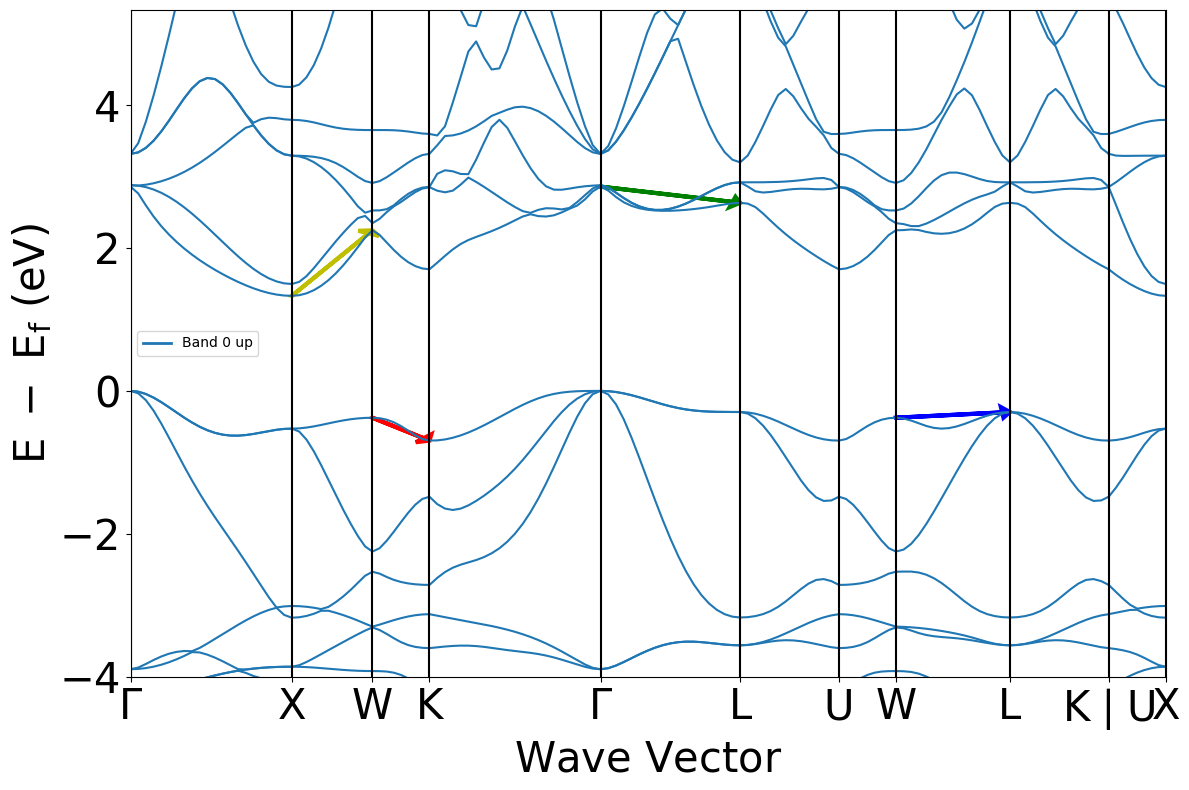

In [7]:
bandstruct.get_plot()
plt.arrow(dist[index_max_slope12], nrj12[index_max_slope12], dist[index_max_slope12 + 1] - dist[index_max_slope12], nrj12[index_max_slope12 + 1] - nrj12[index_max_slope12], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(dist[index_min_slope12], nrj12[index_min_slope12], dist[index_min_slope12 + 1] - dist[index_min_slope12], nrj12[index_min_slope12 + 1] - nrj12[index_min_slope12], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(dist[index_max_slope13], nrj13[index_max_slope13], dist[index_max_slope13 + 1] - dist[index_max_slope13], nrj13[index_max_slope13 + 1] - nrj13[index_max_slope13], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)
plt.arrow(dist[index_min_slope13], nrj13[index_min_slope13], dist[index_min_slope13 + 1] - dist[index_min_slope13], nrj13[index_min_slope13 + 1] - nrj13[index_min_slope13], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.show()

# Masse effective

En supposant une dispertion parabolique, la relation de dispertion entre l'énergie et le vecteur d'onde est: $E(k) = \frac{p^2}{2m} = \frac{\hbar^2k^2}{2m} = \frac{\hbar^2(k_x^2 + k_y^2 + k_z^2)}{2m}$ avec m la masse effective. Donc: $m = \frac{\hbar^2(k_x^2 + k_y^2 + k_z^2)}{2E(k)}$. Il ne reste plus qu'a récupérer le vecteur d'onde et l'énergie associés à ce sommet .

In [8]:
vbm = data.get_vbm()
cbm = data.get_cbm()
kpointv = vbm['kpoint_index']
kpointc = cbm['kpoint_index']
Ev = vbm['energy']*1.602176634e-19
Ec = cbm['energy']*1.602176634e-19

In [9]:
hbar = 1.0545718e-34
massev = (hbar**2 * (kpointv[0]**2 + kpointv[1]**2 + kpointv[2]**2))/(2*abs(Ev))
massec = (hbar**2 * (kpointc[0]**2 + kpointc[1]**2 + kpointc[2]**2))/(2*abs(Ec))
print("La masse effective du sommet de la dernière bande de valance vaut: ",massev,"kg")
print("La masse effective du base de la première bande de conduction vaut: ",massec,"kg")

La masse effective du sommet de la dernière bande de valance vaut:  5.399641558749046e-47 kg
La masse effective du base de la première bande de conduction vaut:  1.1276484886510342e-46 kg
